Import the necessary packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 89s 1us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

Explore the image data

In [ ]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

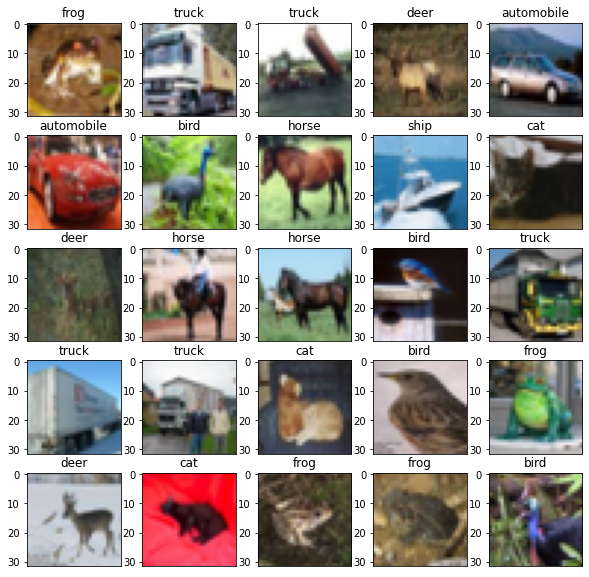

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.title(labels[y_train[i][0]])
  plt.imshow(x_train[i])

Normalization

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

One hot encoding

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [ ]:
y_train_new.shape

(50000, 10)

Build the model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)         

Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train, y_train_new, epochs=10, batch_size=20)

Epoch 1/10
2500/2500 [==============================] - 14s 5ms/step - loss: 1.5565 - accuracy: 0.4258
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 1.2107 - accuracy: 0.5673
Epoch 3/10
2500/2500 [==============================] - 12s 5ms/step - loss: 1.0747 - accuracy: 0.6196
Epoch 4/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.9833 - accuracy: 0.6514
Epoch 5/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.9251 - accuracy: 0.6726
Epoch 6/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.8712 - accuracy: 0.6927
Epoch 7/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.8291 - accuracy: 0.7060
Epoch 8/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.7930 - accuracy: 0.7188
Epoch 9/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.7656 - accuracy: 0.7278
Epoch 10/10
2500/2500 [==============================] - 12s 5ms/step - l

Evaluate the model

In [ ]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 [==============================] - 28s 3ms/step - loss: 0.8799 - accuracy: 0.7009


[0.8798902630805969, 0.7009000182151794]

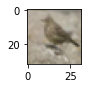

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[120])

In [ ]:
new = x_train[120]
new = new.reshape(1,32,32,3)
labels[np.argmax(model.predict(new, verbose=0))]

'bird'